# 6.2 Exploring relationships

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [55]:
# Matplot version
matplotlib.__version__

'3.5.2'

In [56]:
# Ensuring the charts are displayed in the notebook
%matplotlib inline

In [57]:
# Defining a path
path = r'/Users/hectorvargas/Desktop/Career_Foundry/12-2022 Gun Violence Analysis'

In [58]:
# Importing data
df = pd.read_csv(os.path.join(path, '02 Data','Prepared Data', 'gun_violence_script1.csv'))

In [59]:
# Find duplicates

df_dups = df[df.duplicated()]
df_dups

,Unnamed: 0,participant_age_group,state,date,participant_gender,n_killed,Childs,Teens,Adults,Male,Female


In [61]:
df.head()

,Unnamed: 0,participant_age_group,state,date,participant_gender,n_killed,Childs,Teens,Adults,Male,Female
0,0,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,Pennsylvania,2013-01-01,0::Male||1::Male||3::Male||4::Female,0,0.0,0.0,5.0,3.0,1.0
1,1,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,California,2013-01-01,0::Male,1,0.0,0.0,4.0,1.0,0.0
2,2,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,Ohio,2013-01-01,0::Male||1::Male||2::Male||3::Male||4::Male,1,0.0,0.0,5.0,5.0,0.0
3,3,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,Colorado,2013-01-05,0::Female||1::Male||2::Male||3::Male,4,0.0,0.0,4.0,3.0,1.0
4,4,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,North Carolina,2013-01-07,0::Female||1::Male||2::Male||3::Female,2,0.0,1.0,3.0,2.0,2.0


In [62]:
# Dropping "participant_age_group & participant_gender" cloumns
df = df.drop('participant_gender', axis=1)
df = df.drop('participant_age_group', axis=1)

## Correlations


In [63]:
df.head()

,Unnamed: 0,state,date,n_killed,Childs,Teens,Adults,Male,Female
0,0,Pennsylvania,2013-01-01,0,0.0,0.0,5.0,3.0,1.0
1,1,California,2013-01-01,1,0.0,0.0,4.0,1.0,0.0
2,2,Ohio,2013-01-01,1,0.0,0.0,5.0,5.0,0.0
3,3,Colorado,2013-01-05,4,0.0,0.0,4.0,3.0,1.0
4,4,North Carolina,2013-01-07,2,0.0,1.0,3.0,2.0,2.0


In [64]:
df.corr()

,Unnamed: 0,n_killed,Childs,Teens,Adults,Male,Female
Unnamed: 0,1.000000,0.004568,-0.027202,0.007662,-0.085868,-0.054429,-0.036008
n_killed,0.004568,1.000000,0.061615,0.001792,0.215857,0.133415,0.179318
Childs,-0.027202,0.061615,1.000000,0.007183,-0.019199,0.050626,0.159133
Teens,0.007662,0.001792,0.007183,1.000000,-0.185154,0.193115,0.063837
Adults,-0.085868,0.215857,-0.019199,-0.185154,1.000000,0.728991,0.341344
Male,-0.054429,0.133415,0.050626,0.193115,0.728991,1.000000,-0.061514
Female,-0.036008,0.179318,0.159133,0.063837,0.341344,-0.061514,1.000000


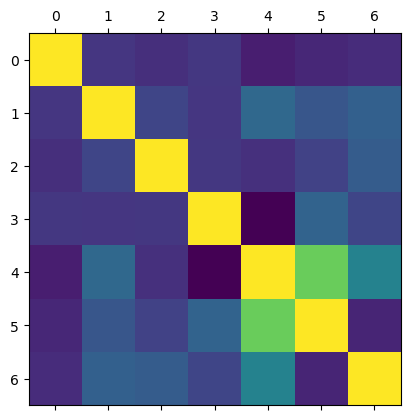

In [65]:
# Creating a correlation heatmap using matplotlib
plt.matshow(df.corr())

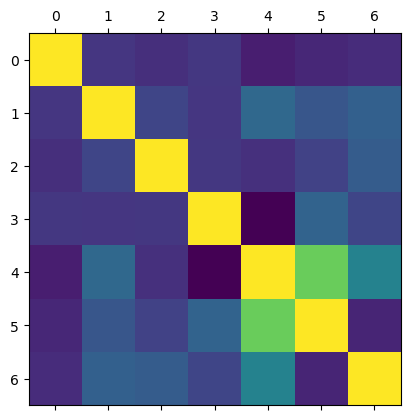

In [66]:
# Saving figures
plt.matshow(df.corr())
plt.savefig("out.png") 

Text(0.5, 1.0, 'Correlation Matrix')

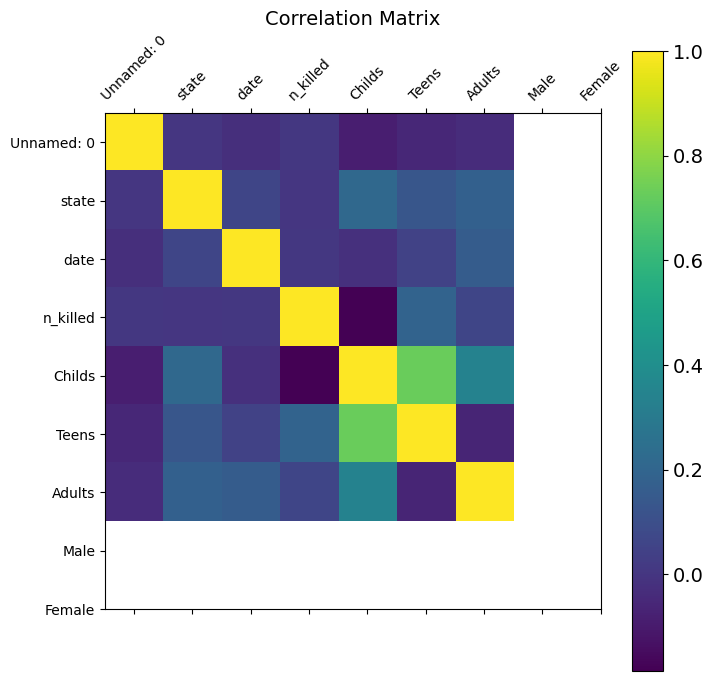

In [73]:
# Adding labels, a legend, and change the size of the heatmap
f = plt.figure(figsize=(8, 8)) 
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=10, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=14)

In [74]:
df.columns

Index(['Unnamed: 0', 'state', 'date', 'n_killed', 'Childs', 'Teens', 'Adults',
       'Male', 'Female'],
      dtype='object')

In [105]:
# Creating a subset excluding the "Date" and "No" columns

sub = df[['state', 'n_killed', 'Childs', 'Teens','Adults', 'Male', 'Female', 'date']]

In [106]:
sub.corr()

,n_killed,Childs,Teens,Adults,Male,Female
n_killed,1.000000,0.061615,0.001792,0.215857,0.133415,0.179318
Childs,0.061615,1.000000,0.007183,-0.019199,0.050626,0.159133
Teens,0.001792,0.007183,1.000000,-0.185154,0.193115,0.063837
Adults,0.215857,-0.019199,-0.185154,1.000000,0.728991,0.341344
Male,0.133415,0.050626,0.193115,0.728991,1.000000,-0.061514
Female,0.179318,0.159133,0.063837,0.341344,-0.061514,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

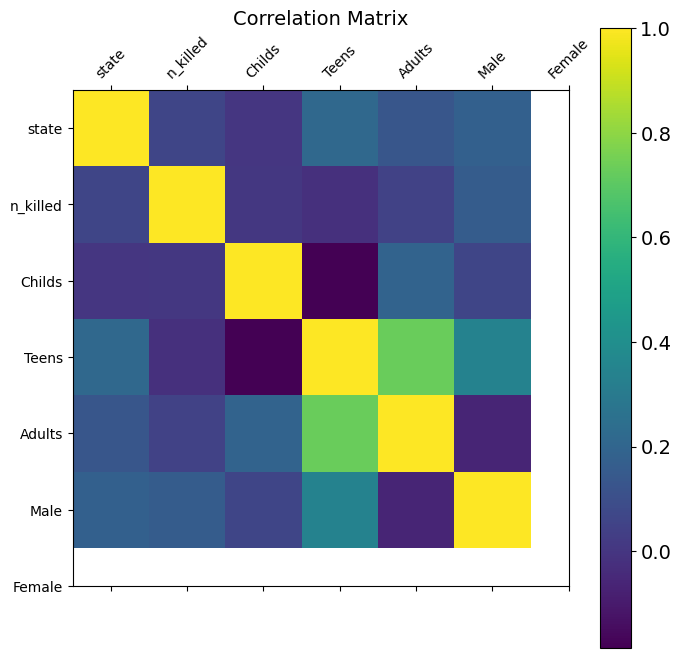

In [79]:
f = plt.figure(figsize=(8, 8)) 
plt.matshow(sub.corr(), fignum=f.number)
plt.xticks(range(sub.shape[1]), sub.columns, fontsize=10, rotation=45)
plt.yticks(range(sub.shape[1]), sub.columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=14)

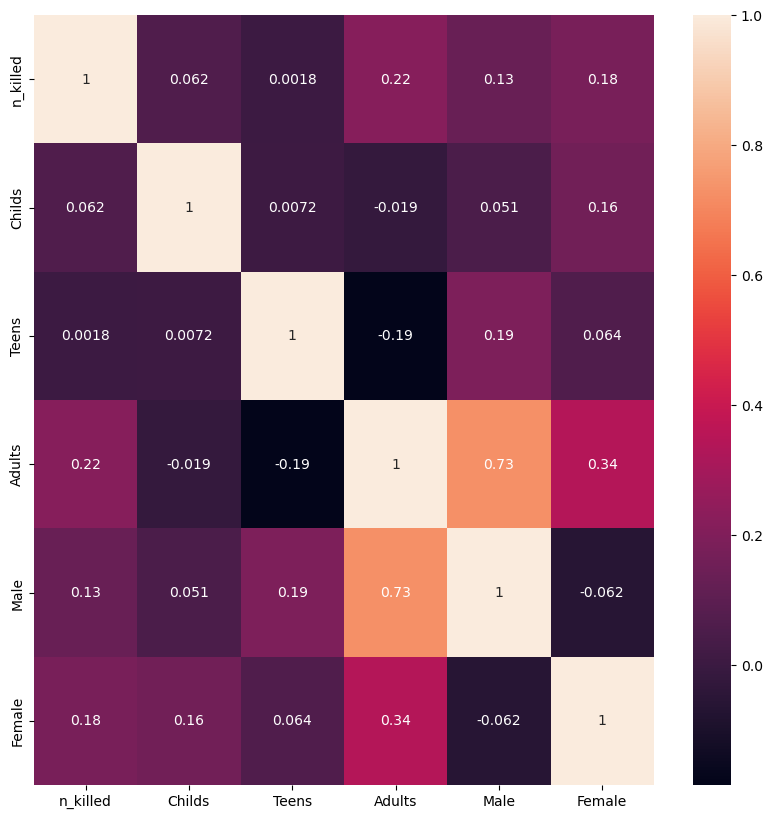

In [107]:
# Creating a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))
corr = sns.heatmap(sub.corr(), annot = True, ax = ax)

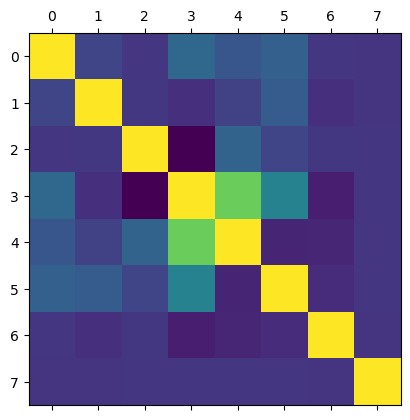

In [142]:
# Saving figures
plt.matshow(sub.corr())
plt.savefig("out.png") 

In [ ]:
# There is a strong correlation between adults and the male gender

### Scatterplots:

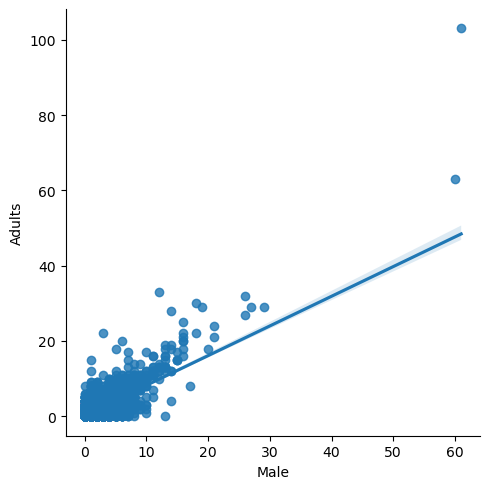

In [108]:
# Creating a scatterplot for the "male gender" and "n_killed" columns in seaborn

sns.lmplot(x = 'Male', y = 'Adults', data = sub)

In [ ]:
# There is a positive relationship between these two columns, but there are still quite a few points that don't correspond with the trend

In [109]:
sub.describe()

,n_killed,Childs,Teens,Adults,Male,Female
count,239677.000000,197558.000000,197558.000000,197558.000000,203315.000000,203315.000000
mean,0.252290,0.023122,0.129658,1.551114,1.520257,0.212340
std,0.521779,0.186675,0.455715,1.083951,0.996762,0.490888
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000
max,50.000000,11.000000,27.000000,103.000000,61.000000,23.000000


### Pair Plots:

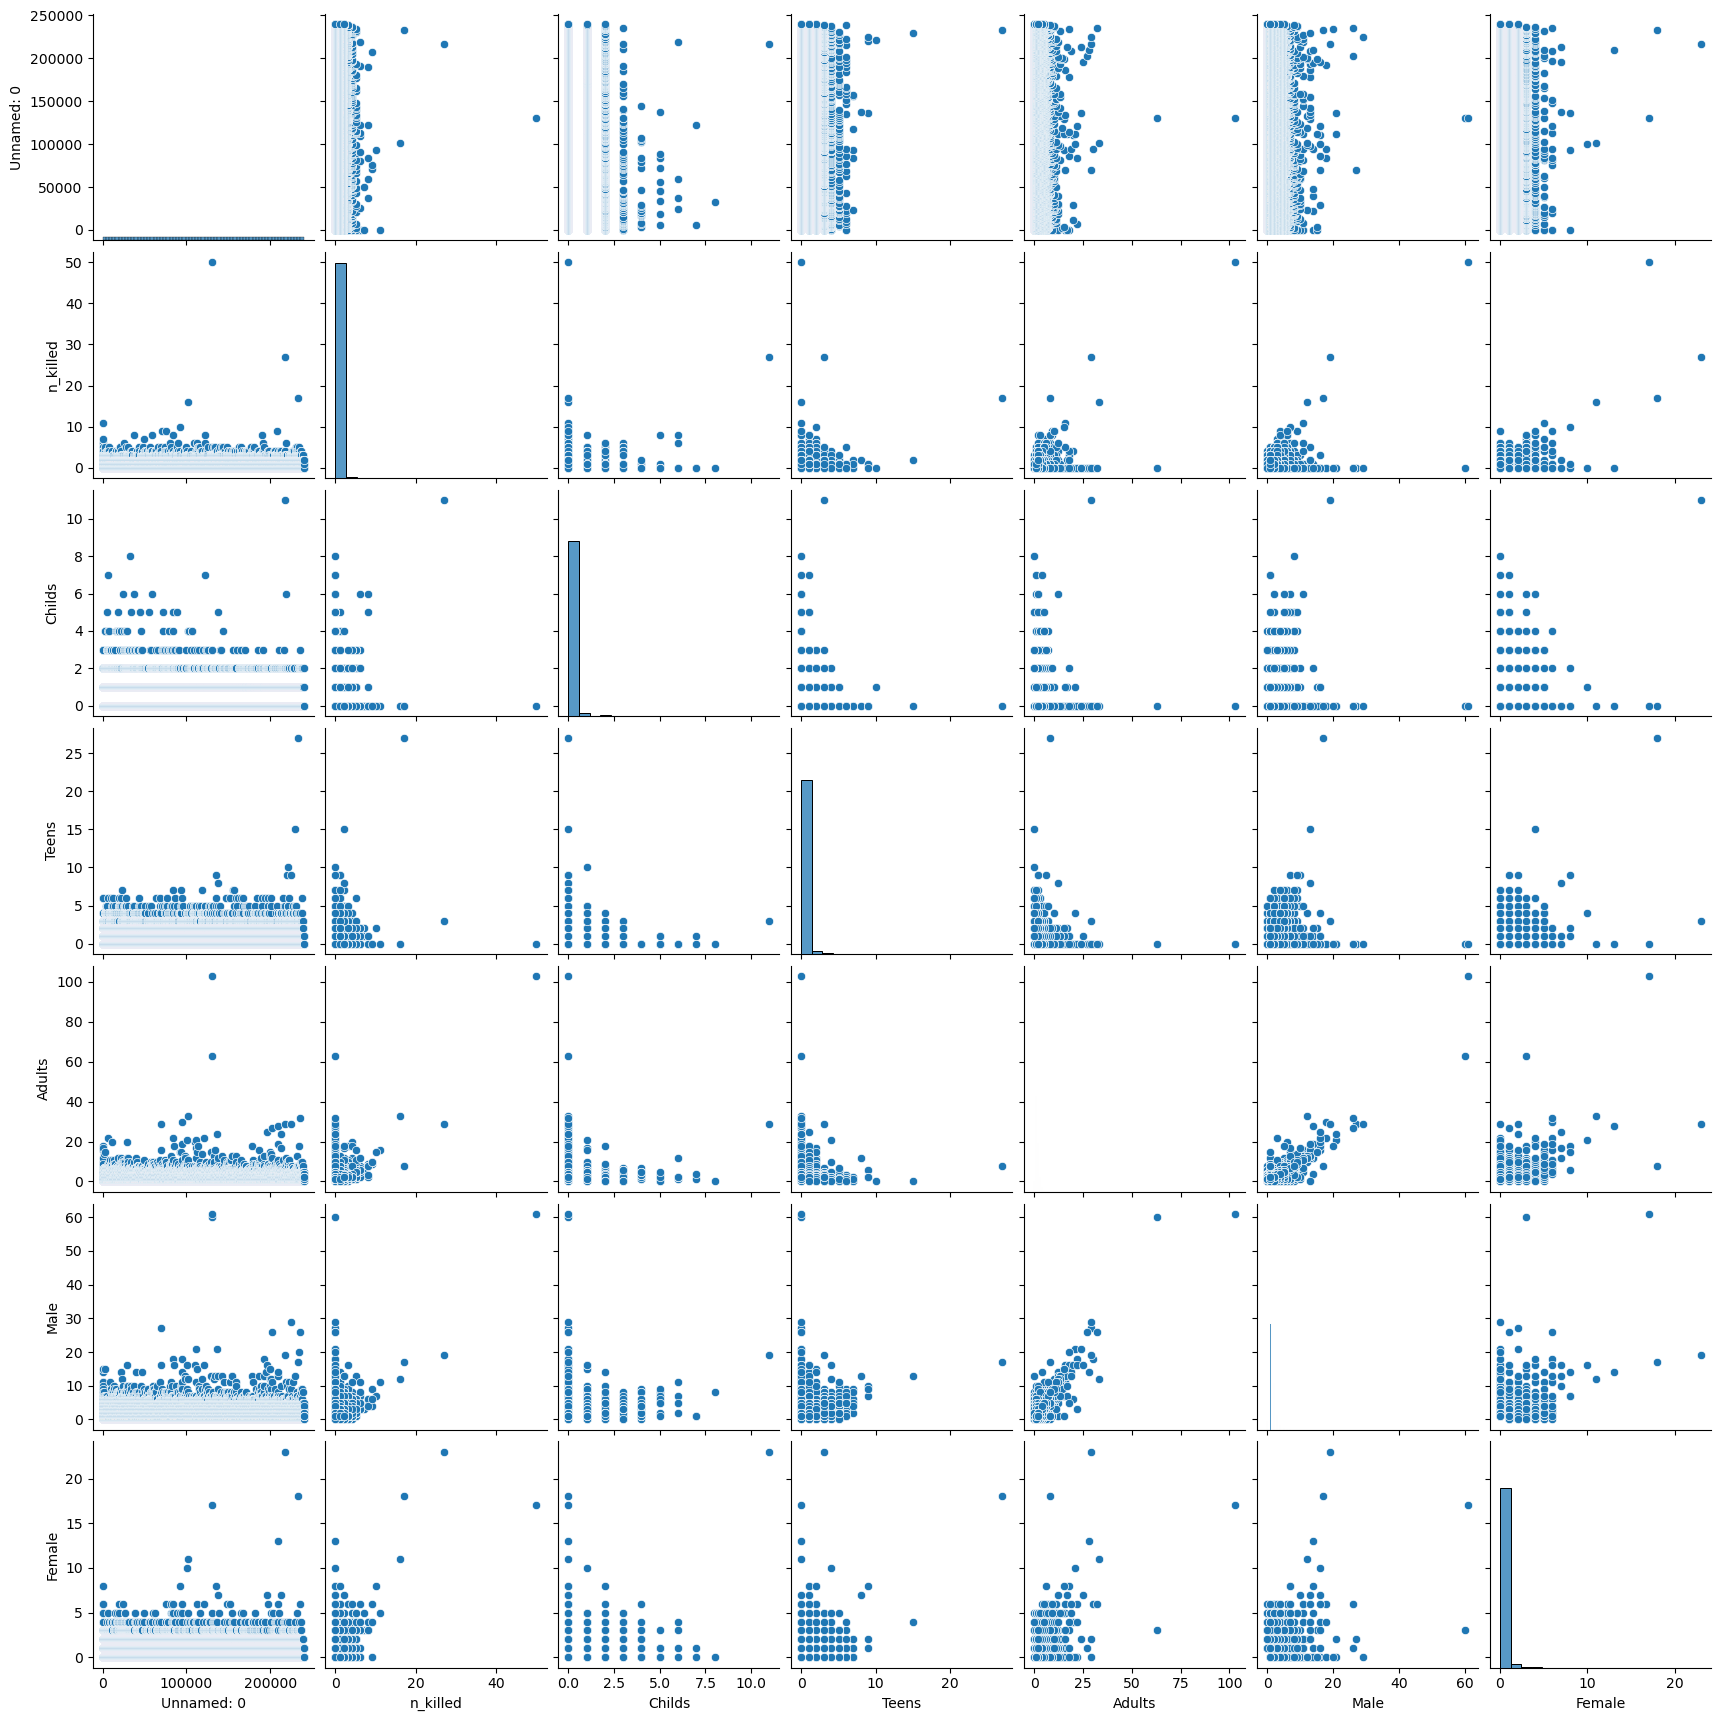

In [87]:
# Creating a pair plot of the intire data set
g = sns.pairplot(df)

In [138]:
# Creating new variables based of date column
sub['year'] = pd.DatetimeIndex(sub['date']).year
sub['month'] = pd.DatetimeIndex(sub['date']).month_name()
sub['day'] = pd.DatetimeIndex(sub['date']).day

<AxesSubplot:xlabel='year', ylabel='Count'>

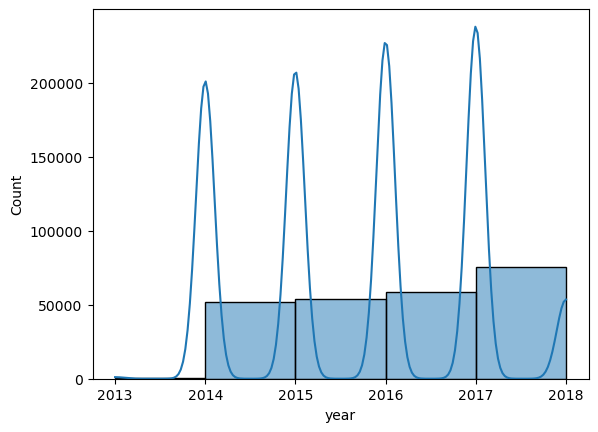

In [141]:
sns.histplot(sub['year'], bins = 5, kde = True)

In [ ]:
# This histogram has given a quick way to visualize the distribution of the year variable.

## Exporting final data set, and saving the notebook.

In [140]:
sub.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'gun_violence_script2.csv')) 